In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

<font size="3">Salem, MO: 1500 UTC 13 April 2022-1500 UTC 14 April 2022</font>

In [2]:
#1 hr hrrr:
with open('hrrr_f01_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 0.127  3.41   4.823  9.169 20.654 26.047 26.177 26.931 27.071 27.071
 27.071 27.071 27.071 27.071 27.071 27.071 27.071 27.071 27.071 27.071
 27.071 27.071 27.071 27.071 27.071]
25


In [3]:
#Air Temp CRN:
with open('CRNH0203-2022-MO_Salem_10_W.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2462:2487]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 1.6 10.3 21.4 28.  34.3 38.7 39.1 39.1 39.1 39.1 39.1 39.1 39.1 39.1
 39.1 39.1 39.1 39.1 39.1 39.1 39.1 39.1 39.1 39.1 39.1]


In [4]:
hour=[]
for i in range(-12,13,1):
    hour.append(i)
    i+=1
print(len(hour))

25


In [5]:
difference_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sal.append(temp_i-temp_crn_i)

print(difference_sal)

[-1.473, -6.889999999999999, -16.576999999999998, -18.831, -13.645999999999997, -12.652999999999995, -12.922999999999995, -12.168999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993, -12.028999999999993]


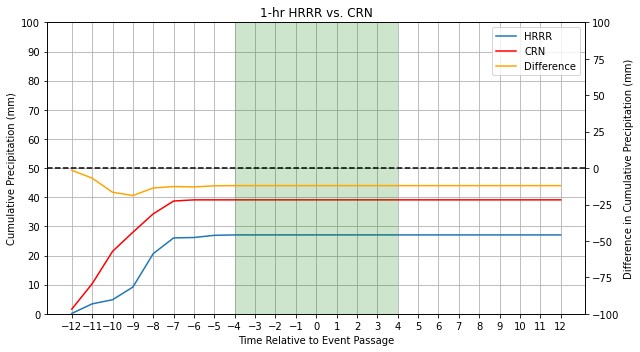

In [6]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sal, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [7]:
#3 hr hrrr:
with open('hrrr_f03_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2460:2485]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.083  3.849 13.273 24.813 46.318 48.806 48.961 48.964 49.4   49.411
 49.411 49.411 49.411 49.411 49.411 49.411 49.411 49.411 49.411 49.411
 49.411 49.411 49.411 49.411 49.411]


In [8]:
diff3_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sal.append(temp_i-temp_crn_i)

print(diff3_sal)

[-1.5170000000000001, -6.450999999999999, -8.126999999999999, -3.187000000000001, 12.018, 10.106000000000002, 9.861000000000004, 9.864000000000004, 10.300000000000004, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007, 10.311000000000007]


In [9]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='yellow', alpha=0.2, lw=0)
# plt.show()

In [10]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",salem3)

In [11]:
#6 hr hrrr:
with open('hrrr_f06_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2457:2482]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 5.071 14.849 24.974 29.944 32.873 34.459 38.977 39.114 39.607 39.607
 39.608 39.608 39.608 39.608 39.608 39.608 39.608 39.608 39.608 39.608
 39.608 39.608 39.608 39.608 39.608]


In [12]:
diff6_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sal.append(temp_i-temp_crn_i)

print(diff6_sal)

[3.4709999999999996, 4.549000000000001, 3.5740000000000016, 1.943999999999999, -1.4269999999999996, -4.241, -0.12299999999999756, 0.014000000000002899, 0.507000000000005, 0.507000000000005, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027, 0.5080000000000027]


In [13]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [14]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",salem6)

In [15]:
#12 hr hrrr:
with open('hrrr_f12_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2451:2476]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 7.185 30.543 51.394 54.968 59.611 61.329 67.102 67.326 67.4   67.4
 67.4   67.4   67.4   67.4   67.4   67.4   67.4   67.4   67.4   67.4
 67.4   67.4   67.4   67.4   67.4  ]
25


In [16]:
diff12_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sal.append(temp_i-temp_crn_i)

print(diff12_sal)

[5.584999999999999, 20.243000000000002, 29.994, 26.967999999999996, 25.311, 22.628999999999998, 28.001999999999995, 28.226, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997, 28.299999999999997]


In [17]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [18]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",salem12)

In [19]:
#18 hr hrrr:
with open('hrrr_f18_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2445:2470]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[4.0000e-03 1.9330e+00 4.5330e+00 1.9840e+01 3.3194e+01 3.5489e+01
 3.7734e+01 3.8100e+01 3.8106e+01 3.8106e+01 3.8106e+01 3.8106e+01
 3.8106e+01 3.8106e+01 3.8106e+01 3.8106e+01 3.8106e+01 3.8106e+01
 3.8106e+01 3.8106e+01 3.8106e+01 3.8106e+01 3.8106e+01 3.8106e+01
 3.8106e+01]


In [20]:
diff18_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sal.append(temp_i-temp_crn_i)

print(diff18_sal)

[-1.596, -8.366999999999999, -16.866999999999997, -8.16, -1.1059999999999945, -3.2109999999999914, -1.3659999999999926, -0.9999999999999929, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927, -0.9939999999999927]


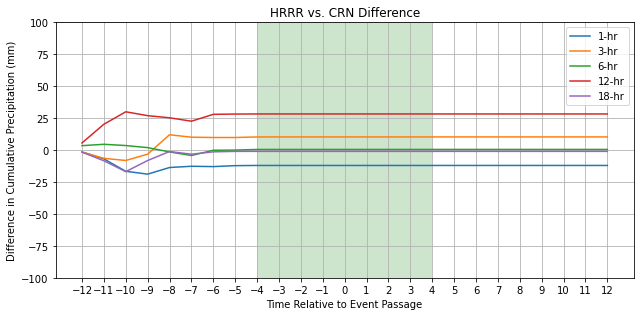

In [21]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sal,label="1-hr")
plt.plot(hour,diff3_sal,label="3-hr")
plt.plot(hour,diff6_sal,label="6-hr")
plt.plot(hour,diff12_sal,label="12-hr")
plt.plot(hour,diff18_sal,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

In [22]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",salem18)

<font size="3">Batesville, AR: 1500 UTC 13 April 2022-1500 UTC 14 April 2022</font>

In [23]:
#1 hr hrrr:
with open('hrrr_f01_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.044  0.044  0.141  3.417 13.736 14.888 14.999 15.394 15.554 15.554
 15.554 15.554 15.554 15.554 15.554 15.554 15.554 15.554 15.554 15.554
 15.554 15.554 15.554 15.554 15.554]


In [24]:
#Air Temp CRN:
with open('CRNH0203-2022-AR_Batesville_8_WNW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2462:2487]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 1.7  1.7  1.7  3.6 22.2 24.2 24.2 24.2 24.2 24.2 24.2 24.2 24.2 24.2
 24.2 24.2 24.2 24.2 24.2 24.2 24.2 24.2 24.2 24.2 24.2]


In [25]:
difference_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bat.append(temp_i-temp_crn_i)

print(difference_bat)

[-1.656, -1.656, -1.559, -0.18299999999999983, -8.464000000000002, -9.312000000000003, -9.201000000000002, -8.806000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003, -8.646000000000003]


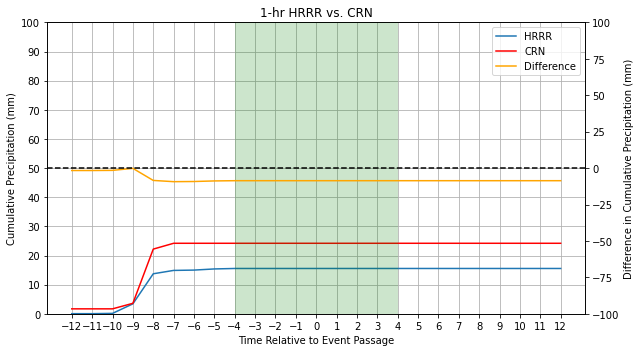

In [26]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bat, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [27]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [28]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",batesville1)

In [29]:
#3 hr hrrr:
with open('hrrr_f03_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2460:2485]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 2.0000e-03 3.7030e+00 1.0432e+01 1.0443e+01
 1.1390e+01 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01
 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01
 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01 1.4057e+01
 1.4057e+01]


In [30]:
diff3_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bat.append(temp_i-temp_crn_i)

print(diff3_bat)

[-1.7, -1.7, -1.698, 0.1030000000000002, -11.768000000000002, -13.757000000000003, -12.810000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004, -10.143000000000004]


In [31]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [32]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",batesville3)

In [33]:
#6 hr hrrr:
with open('hrrr_f06_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2457:2482]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.124 13.677 28.531 30.937 31.574 35.524 35.524 35.558
 35.558 35.558 35.558 35.558 35.558 35.558 35.558 35.558 35.558 35.558
 35.558 35.558 35.558 35.558 35.558]


In [34]:
diff6_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bat.append(temp_i-temp_crn_i)

print(diff6_bat)

[-1.7, -1.7, -1.576, 10.077000000000002, 6.330999999999996, 6.736999999999995, 7.373999999999995, 11.323999999999998, 11.323999999999998, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997, 11.357999999999997]


In [35]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [36]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",batesville6)

In [37]:
#12 hr hrrr:
with open('hrrr_f12_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2451:2476]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.    2.342 2.35  2.389 2.664 2.84  3.946 4.655 4.656 4.656 4.656 4.656
 4.656 4.656 4.656 4.656 4.656 4.656 4.656 4.656 4.656 4.656 4.656 4.656
 4.656]
25


In [38]:
diff12_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bat.append(temp_i-temp_crn_i)

print(diff12_bat)

[-1.7, 0.6420000000000001, 0.6500000000000001, -1.2109999999999994, -19.536, -21.360000000000003, -20.254, -19.545, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004, -19.544000000000004]


In [39]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [40]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",batesville12)

In [41]:
#18 hr hrrr:
with open('hrrr_f18_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2445:2470]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.13   4.458  4.458  5.211  5.74   9.868 12.428 17.472 17.489 17.489
 17.489 17.489 17.489 17.489 17.489 17.489 17.489 17.489 17.489 17.489
 17.489 17.489 17.489 17.489 17.489]


In [42]:
diff18_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bat.append(temp_i-temp_crn_i)

print(diff18_bat)

[-1.5699999999999998, 2.758, 2.758, 1.6110000000000007, -16.46, -14.332000000000003, -11.772000000000002, -6.7280000000000015, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002, -6.711000000000002]


In [43]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [44]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",batesville18)

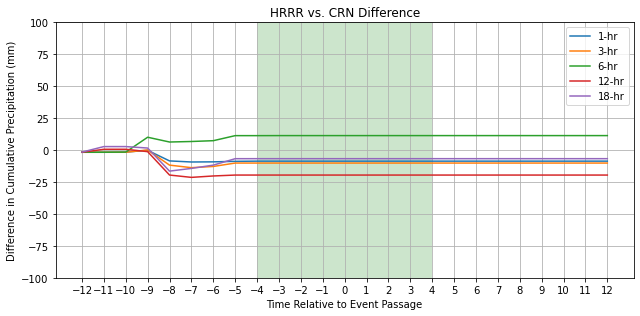

In [45]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bat,label="1-hr")
plt.plot(hour,diff3_bat,label="3-hr")
plt.plot(hour,diff6_bat,label="6-hr")
plt.plot(hour,diff12_bat,label="12-hr")
plt.plot(hour,diff18_bat,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Lafayette, LA: 2000 UTC 13 April 2022-2000 UTC 14 April 2022
</font>

In [46]:
#1 hr hrrr:
with open('hrrr_f01_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2467:2492]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.     0.06   0.17   0.72   1.082  3.056 15.066
 15.066 15.066 15.066 15.066 15.066 15.066 15.066 15.066 15.066 15.066
 15.066 15.066 15.066 15.066 15.066]


In [47]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Lafayette_13_SE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2467:2492]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.   0.   0.   0.   0.   7.9 29.6 31.2 31.2 31.2 31.2 31.2
 31.2 31.2 31.2 31.2 31.2 31.2 31.2 31.2 31.2 31.2 31.2]


In [48]:
difference_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_laf.append(temp_i-temp_crn_i)

print(difference_laf)

[0.0, 0.0, 0.0, 0.0, 0.06, 0.16999999999999998, 0.72, -6.8180000000000005, -26.544, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004, -16.134000000000004]


In [49]:
# hour=[]
# for i in range(-15,16,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

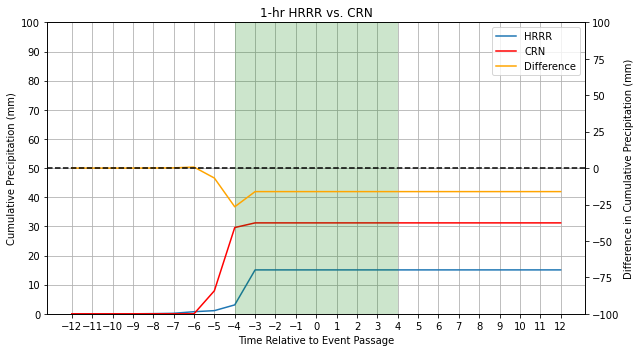

In [50]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_laf, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [51]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [52]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",lafayette1)

RSME 1-hr 48-hr HRRR vs CRN : 14.02357337628324


In [53]:
#3 hr hrrr:
with open('hrrr_f03_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2465:2490]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-03 2.0000e-03
 3.3000e-02 1.3500e-01 9.4020e+00 3.9525e+01 3.9806e+01 3.9817e+01
 3.9817e+01 3.9817e+01 3.9817e+01 3.9817e+01 3.9817e+01 3.9817e+01
 3.9817e+01 3.9817e+01 3.9817e+01 3.9817e+01 3.9817e+01 3.9817e+01
 3.9817e+01]


In [54]:
diff3_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_laf.append(temp_i-temp_crn_i)

print(diff3_laf)

[0.0, 0.0, 0.0, 0.0, 0.001, 0.002, 0.033, -7.765000000000001, -20.198, 8.324999999999996, 8.605999999999995, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997, 8.616999999999997]


In [55]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [56]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",lafayette3)

RSME 3-hr 48-hr HRRR vs CRN : 8.126898621245374


In [57]:
#6 hr hrrr:
with open('hrrr_f06_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.     0.     0.124  0.136  0.515 27.174 56.93
 57.575 57.577 57.578 57.614 57.62  57.63  57.63  57.631 57.631 57.631
 57.631 57.631 57.631 57.631 57.631]


In [58]:
diff6_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_laf.append(temp_i-temp_crn_i)

print(diff6_laf)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.124, 0.136, -7.385000000000001, -2.426000000000002, 25.729999999999997, 26.375, 26.377000000000002, 26.378, 26.414, 26.42, 26.43, 26.43, 26.430999999999997, 26.430999999999997, 26.430999999999997, 26.430999999999997, 26.430999999999997, 26.430999999999997, 26.430999999999997, 26.430999999999997]


In [59]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [60]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",lafayette6)

RSME 6-hr 48-hr HRRR vs CRN : 21.15775394034064


In [61]:
#12 hr hrrr:
with open('hrrr_f12_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2456:2481]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 1.0000e-03 1.3000e-02 5.7600e-01 6.2900e-01
 8.7400e-01 1.0240e+00 1.8196e+01 2.6099e+01 2.6103e+01 2.6108e+01
 2.6109e+01 2.6117e+01 2.6119e+01 2.6119e+01 2.6119e+01 2.6119e+01
 2.6119e+01 2.6119e+01 2.6119e+01 2.6119e+01 2.6119e+01 2.6119e+01
 2.6119e+01]
25


In [62]:
diff12_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_laf.append(temp_i-temp_crn_i)

print(diff12_laf)

[0.0, 0.0, 0.001, 0.013000000000000001, 0.576, 0.629, 0.874, -6.876, -11.404, -5.101000000000003, -5.097000000000001, -5.092000000000002, -5.091000000000001, -5.083000000000002, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003, -5.081000000000003]


In [63]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [64]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",lafayette12)

RSME 12-hr 48-hr HRRR vs CRN : 4.8682131013340015


In [65]:
#18 hr hrrr:
with open('hrrr_f18_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    
    temp=temp[2450:2475]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 3.202  3.241  3.706  3.865  3.922  4.169  7.078  7.288 12.314 12.412
 14.091 15.587 15.587 15.587 15.591 15.602 15.607 15.607 15.607 15.607
 15.607 15.607 15.607 15.607 15.607]


In [66]:
diff18_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_laf.append(temp_i-temp_crn_i)

print(diff18_laf)

[3.202, 3.241, 3.706, 3.8649999999999998, 3.9219999999999997, 4.169, 7.077999999999999, -0.612000000000001, -17.286, -18.788000000000004, -17.109, -15.613000000000001, -15.613000000000001, -15.613000000000001, -15.609000000000002, -15.598000000000003, -15.593000000000002, -15.593000000000002, -15.593000000000002, -15.593000000000002, -15.593000000000002, -15.593000000000002, -15.593000000000002, -15.593000000000002, -15.593000000000002]


In [67]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [68]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",lafayette18)

RSME 18-hr 48-hr HRRR vs CRN : 13.392069403942022


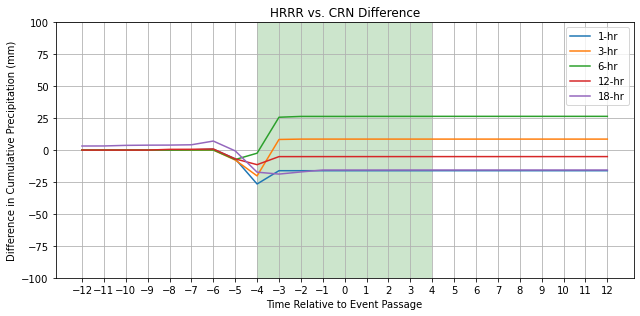

In [69]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_laf,label="1-hr")
plt.plot(hour,diff3_laf,label="3-hr")
plt.plot(hour,diff6_laf,label="6-hr")
plt.plot(hour,diff12_laf,label="12-hr")
plt.plot(hour,diff18_laf,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Monroe, LA: 2000 UTC 13 April 2022-2000 UTC 14 April 2022</font>

In [70]:
#1 hr hrrr:
with open('hrrr_f01_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2467:2492]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.294 3.457 3.851 4.971 5.101 5.101 5.101 5.101 5.101 5.101 5.101 5.101
 5.101 5.101 5.101 5.101 5.101 5.101 5.101 5.101 5.101 5.101 5.101 5.101
 5.101]


In [71]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Monroe_26_N.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2467:2492]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.  0.  3.5 3.5 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1
 8.1 8.1 8.1 8.1 8.1 8.1 8.1]


In [72]:
difference_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_mon.append(temp_i-temp_crn_i)

print(difference_mon)

[1.294, 3.457, 0.351, 1.471, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997, -2.9989999999999997]


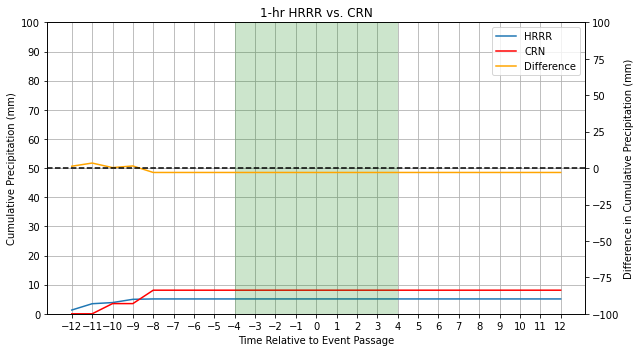

In [73]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_mon, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [74]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [75]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",monroe1)

RSME 1-hr 48-hr HRRR vs CRN : 2.862071613359805


In [76]:
#3 hr hrrr:
with open('hrrr_f03_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2465:2490]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 1.709  2.391  3.961 11.69  38.381 38.402 38.402 38.402 38.402 38.402
 38.402 38.402 38.402 38.402 38.402 38.402 38.402 38.402 38.402 38.402
 38.402 38.402 38.402 38.402 38.402]


In [77]:
diff3_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_mon.append(temp_i-temp_crn_i)

print(diff3_mon)

[1.709, 2.391, 0.4610000000000003, 8.190000000000001, 30.281, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302, 30.302]


In [78]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [79]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",monroe3)

RSME 3-hr 48-hr HRRR vs CRN : 27.825951357680474


In [80]:
#6 hr hrrr:
with open('hrrr_f06_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 3.498 11.658 13.416 52.342 53.472 53.472 53.472 53.472 53.472 53.472
 53.472 53.472 53.472 53.472 53.472 53.472 53.472 53.472 53.472 53.472
 53.472 53.472 53.472 53.472 53.472]


In [81]:
diff6_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_mon.append(temp_i-temp_crn_i)

print(diff6_mon)

[3.498, 11.658000000000001, 9.916, 48.842, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372, 45.372]


In [82]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [83]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",monroe6)

RSME 6-hr 48-hr HRRR vs CRN : 42.83129652578824


In [84]:
#12 hr hrrr:
with open('hrrr_f12_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2456:2481]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.59  0.875 0.97  0.974 4.539 4.55  4.55  4.55  4.55  4.55  4.55  4.55
 4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55
 4.55 ]
25


In [85]:
diff12_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_mon.append(temp_i-temp_crn_i)

print(diff12_mon)

[0.59, 0.875, -2.5300000000000002, -2.526, -3.561, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55, -3.55]


In [86]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [87]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",monroe12)

RSME 12-hr 48-hr HRRR vs CRN : 3.3384189191891425


In [88]:
#18 hr hrrr:
with open('hrrr_f18_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2450:2475]   
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.675  8.052  8.429  8.63  13.571 20.237 20.238 20.238 20.238 20.238
 20.238 20.238 20.238 20.238 20.238 20.238 20.238 20.238 20.238 20.238
 20.238 20.238 20.238 20.238 20.238]


In [89]:
diff18_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_mon.append(temp_i-temp_crn_i)

print(diff18_mon)

[0.675, 8.052, 4.929, 5.130000000000001, 5.471000000000002, 12.137000000000002, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003, 12.138000000000003]


In [90]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [91]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",monroe18)

RSME 18-hr 48-hr HRRR vs CRN : 11.121925581480935


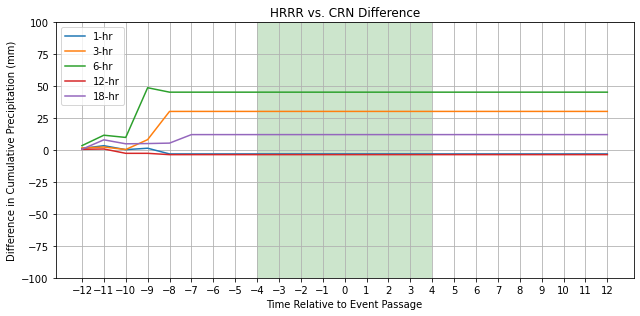

In [92]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_mon,label="1-hr")
plt.plot(hour,diff3_mon,label="3-hr")
plt.plot(hour,diff6_mon,label="6-hr")
plt.plot(hour,diff12_mon,label="12-hr")
plt.plot(hour,diff18_mon,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Holly Springs, MS: 2300 UTC 13 April 2022-2300 UTC 14 April 2022</font>

In [93]:
#1 hr hrrr:
with open('hrrr_f01_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2470:2495]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.0000e-02 7.7800e+00 1.2016e+01 1.4416e+01 1.4422e+01 1.4437e+01
 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01
 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01
 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01 1.4437e+01
 1.4437e+01]


In [94]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Holly_Springs_4_N.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2470:2495]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[20.  29.7 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9
 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9 29.9]


In [95]:
difference_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_hol.append(temp_i-temp_crn_i)

print(difference_hol)

[-19.99, -21.92, -17.884, -15.484, -15.478, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463, -15.463]


In [96]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [97]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",holly1)

RSME 1-hr 48-hr HRRR vs CRN : 16.07648478492733


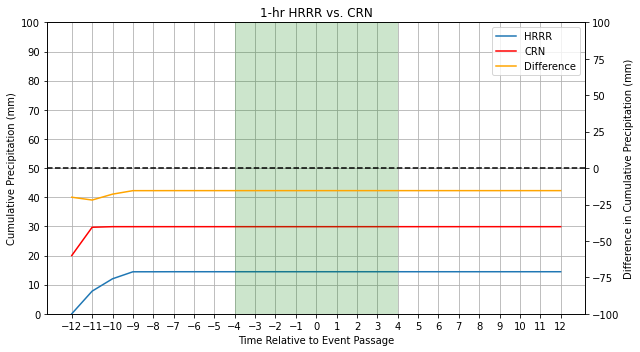

In [98]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_hol, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [99]:
#3 hr hrrr:
with open('hrrr_f03_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2468:2493]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.715  4.127 11.12  11.121 11.121 11.16  11.867 11.868 11.868 11.868
 11.868 11.868 11.868 11.868 11.868 11.868 11.868 11.868 11.868 11.868
 11.868 11.868 11.868 11.868 11.868]


In [100]:
diff3_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_hol.append(temp_i-temp_crn_i)

print(diff3_hol)

[-19.285, -25.573, -18.779999999999998, -18.778999999999996, -18.778999999999996, -18.74, -18.032999999999998, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996, -18.031999999999996]


In [101]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [102]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",holly3)

RSME 3-hr 48-hr HRRR vs CRN : 18.561261548720225


In [103]:
#6 hr hrrr:
with open('hrrr_f06_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2465:2490]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 1.043 10.154 18.494 19.107 19.529 19.837 19.837 19.837 19.837 19.837
 19.837 19.837 19.837 19.837 19.837 19.837 19.837 19.837 19.837 19.837
 19.837 19.837 19.837 19.837 19.837]


In [104]:
diff6_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_hol.append(temp_i-temp_crn_i)

print(diff6_hol)

[-18.957, -19.546, -11.405999999999999, -10.793, -10.370999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999, -10.062999999999999]


In [105]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [106]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",holly6)

RSME 6-hr 48-hr HRRR vs CRN : 11.172889815978674


In [107]:
#12 hr hrrr:
with open('hrrr_f12_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2459:2484]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.095 0.347 0.921 0.941 3.991 4.575 4.575 4.575 4.575 4.575 4.575 4.575
 4.575 4.575 4.575 4.575 4.575 4.575 4.575 4.575 4.575 4.575 4.575 4.575
 4.575]
25


In [108]:
diff12_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_hol.append(temp_i-temp_crn_i)

print(diff12_hol)

[-19.905, -29.352999999999998, -28.979, -28.959, -25.909, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325, -25.325]


In [109]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [110]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",holly12)

RSME 12-hr 48-hr HRRR vs CRN : 25.63950275414872


In [111]:
#18 hr hrrr:
with open('hrrr_f18_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2453:2478]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[2.0000e-03 1.9790e+00 3.8512e+01 4.3894e+01 4.3900e+01 4.3900e+01
 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01
 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01
 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01 4.3900e+01
 4.3900e+01]


In [112]:
diff18_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_hol.append(temp_i-temp_crn_i)

print(diff18_hol)

[-19.998, -27.721, 8.612000000000002, 13.994, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]


In [113]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [114]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",holly18)

RSME 18-hr 48-hr HRRR vs CRN : 14.905532429269341


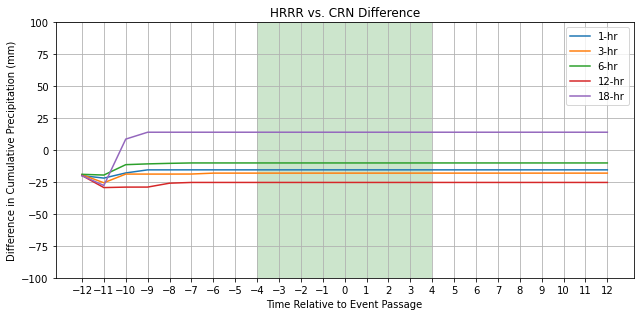

In [115]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_hol,label="1-hr")
plt.plot(hour,diff3_hol,label="3-hr")
plt.plot(hour,diff6_hol,label="6-hr")
plt.plot(hour,diff12_hol,label="12-hr")
plt.plot(hour,diff18_hol,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Newton, MS: 2300 UTC 13 April 2022-2300 UTC 14 April 2022</font>

In [116]:
#1 hr hrrr:
with open('hrrr_f01_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2470:2495]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.006 0.566 0.99  2.284 2.694 2.702 2.772 3.528 3.595 3.687
 3.687 3.687 3.687 3.687 3.687 3.687 3.687 3.687 3.687 3.687 3.687 3.687
 3.687]


In [117]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Newton_5_ENE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2470:2495]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.  16.5 21.  24.6 25.2 25.2 25.2 25.4 25.4 25.4 25.4 25.4
 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4]


In [118]:
difference_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_new.append(temp_i-temp_crn_i)

print(difference_new)

[0.0, 0.0, 0.006, -15.934, -20.01, -22.316000000000003, -22.506000000000004, -22.498000000000005, -22.428000000000004, -21.872000000000003, -21.805000000000003, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713, -21.713]


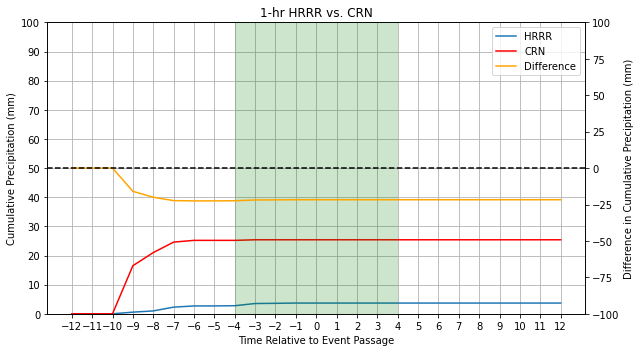

In [119]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_new, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [120]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [121]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonms1)

RSME 1-hr 48-hr HRRR vs CRN : 20.22097440481047


In [122]:
#3 hr hrrr:
with open('hrrr_f03_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2468:2493]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.025  0.055 24.018 24.477 24.482 24.482 24.482 24.482
 24.482 24.483 24.483 24.483 24.483 24.483 24.483 24.483 24.483 24.483
 24.483 24.483 24.483 24.483 24.483]


In [123]:
diff3_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_new.append(temp_i-temp_crn_i)

print(diff3_new)

[0.0, 0.0, 0.025, -16.445, 3.0180000000000007, -0.12300000000000111, -0.7180000000000035, -0.7180000000000035, -0.7180000000000035, -0.9180000000000028, -0.9180000000000028, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016, -0.9170000000000016]


In [124]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [125]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonms3)

RSME 3-hr 48-hr HRRR vs CRN : 3.4325883470057987


In [126]:
#6 hr hrrr:
with open('hrrr_f06_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2465:2490]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.196  1.802 28.306 29.741 30.069 30.072 30.074 35.694
 35.876 35.876 35.876 35.876 35.876 35.876 35.876 35.876 35.876 35.876
 35.876 35.876 35.876 35.876 35.876]


In [127]:
diff6_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_new.append(temp_i-temp_crn_i)

print(diff6_new)

[0.0, 0.0, 0.196, -14.698, 7.306000000000001, 5.140999999999998, 4.868999999999996, 4.871999999999996, 4.873999999999995, 10.293999999999993, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996, 10.475999999999996]


In [128]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [129]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonms6)

RSME 6-hr 48-hr HRRR vs CRN : 9.20704433355243


In [130]:
#12 hr hrrr:
with open('hrrr_f12_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2459:2484]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 3.5000e-02 1.9831e+01 2.6892e+01 2.7979e+01
 2.8174e+01 3.7121e+01 3.8778e+01 3.9979e+01 3.9979e+01 3.9979e+01
 3.9979e+01 3.9979e+01 3.9979e+01 3.9979e+01 3.9979e+01 3.9979e+01
 3.9979e+01 3.9979e+01 3.9979e+01 3.9979e+01 3.9979e+01 3.9979e+01
 3.9979e+01]
25


In [131]:
diff12_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_new.append(temp_i-temp_crn_i)

print(diff12_new)

[0.0, 0.0, 0.035, 3.3309999999999995, 5.8919999999999995, 3.378999999999998, 2.9739999999999966, 11.920999999999992, 13.577999999999989, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999, 14.57899999999999]


In [132]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [133]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonms12)

RSME 12-hr 48-hr HRRR vs CRN : 12.317959162133953


In [134]:
#18 hr hrrr:
with open('hrrr_f18_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2453:2478]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.531  0.581  0.581  0.582  0.583  6.687  9.204 10.82  12.796 12.881
 12.881 12.881 12.881 12.881 12.881 12.881 12.881 12.881 12.881 12.881
 12.881 12.881 12.881 12.881 12.881]


In [135]:
diff18_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_new.append(temp_i-temp_crn_i)

print(diff18_new)

[0.531, 0.5810000000000001, 0.5810000000000001, -15.918, -20.417, -17.913, -15.996000000000002, -14.380000000000003, -12.404000000000003, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002, -12.519000000000002]


In [136]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [137]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonms18)

RSME 18-hr 48-hr HRRR vs CRN : 12.831509144290084


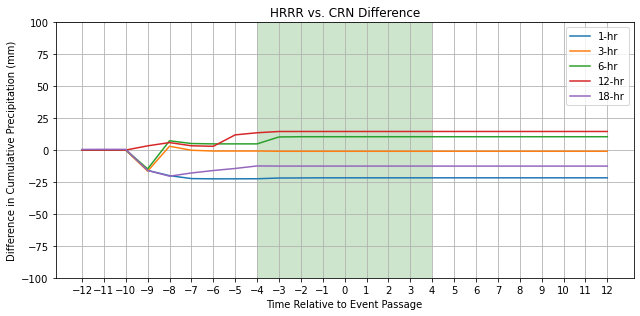

In [138]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_new,label="1-hr")
plt.plot(hour,diff3_new,label="3-hr")
plt.plot(hour,diff6_new,label="6-hr")
plt.plot(hour,diff12_new,label="12-hr")
plt.plot(hour,diff18_new,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gainesville, AL: 0200 UTC 14 April 2022-0200 UTC 15 April 2022</font>

In [139]:
#1 hr hrrr:
with open('hrrr_f01_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2473:2498]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.06  15.045 16.291 16.561 16.987 16.987 17.008 17.562 17.858 17.861
 17.861 17.861 17.861 17.861 17.861 17.861 17.861 17.861 17.861 17.861
 17.861 17.861 17.861 17.861 17.861]


In [140]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Gainesville_2_NE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2473:2498]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.  12.3 16.6 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5
 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5 17.5]


In [141]:
difference_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_gai.append(temp_i-temp_crn_i)

print(difference_gai)

[0.06, 2.744999999999999, -0.30900000000000105, -0.9390000000000001, -0.5130000000000017, -0.5130000000000017, -0.4920000000000009, 0.06199999999999761, 0.357999999999997, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971, 0.3609999999999971]


In [142]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [143]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",gainesville1)

RSME 1-hr 48-hr HRRR vs CRN : 0.6782734846652924


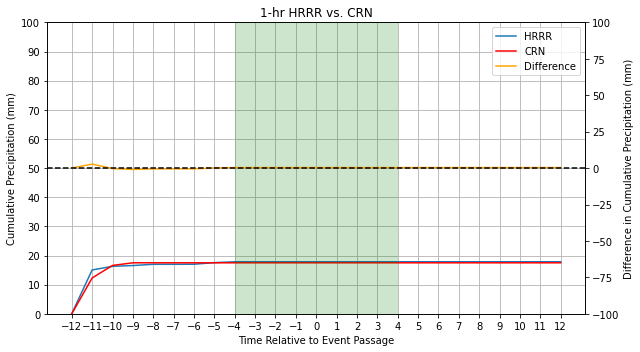

In [144]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_gai, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [145]:
#3 hr hrrr:
with open('hrrr_f03_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2471:2496]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    4.169 9.173 9.362 9.407 9.407 9.407 9.414 9.575 9.576 9.576 9.576
 9.576 9.576 9.576 9.576 9.576 9.576 9.576 9.576 9.576 9.576 9.576 9.576
 9.576]


In [146]:
diff3_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_gai.append(temp_i-temp_crn_i)

print(diff3_gai)

[0.0, -8.131, -7.427000000000003, -8.138000000000002, -8.093000000000002, -8.093000000000002, -8.093000000000002, -8.086000000000002, -7.9250000000000025, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003, -7.924000000000003]


In [147]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [148]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",gainesville3)

RSME 3-hr 48-hr HRRR vs CRN : 7.789264196315338


In [149]:
#6 hr hrrr:
with open('hrrr_f06_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2468:2493]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     4.215  9.553 11.456 11.472 11.611 12.897 15.353 15.425 15.456
 15.461 15.555 15.555 15.555 15.555 15.555 15.555 15.555 15.555 15.555
 15.555 15.555 15.555 15.555 15.555]


In [150]:
diff6_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_gai.append(temp_i-temp_crn_i)

print(diff6_gai)

[0.0, -8.085, -7.047000000000001, -6.043999999999999, -6.027999999999999, -5.888999999999999, -4.603, -2.1470000000000002, -2.075000000000001, -2.0440000000000005, -2.0389999999999997, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003, -1.9450000000000003]


In [151]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [152]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",gainesville6)

RSME 6-hr 48-hr HRRR vs CRN : 3.5438686488074023


In [153]:
#12 hr hrrr:
with open('hrrr_f12_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[18.041 23.347 23.75  24.192 25.131 28.455 31.36  32.801 33.074 33.094
 33.11  33.113 33.113 33.113 33.113 33.113 33.113 33.113 33.113 33.113
 33.113 33.113 33.113 33.113 33.113]
25


In [154]:
diff12_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_gai.append(temp_i-temp_crn_i)

print(diff12_gai)

[18.041, 11.047, 7.149999999999999, 6.692, 7.631, 10.954999999999998, 13.86, 15.301000000000002, 15.574000000000005, 15.594000000000008, 15.610000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007, 15.613000000000007]


In [155]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [156]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",gainesville12)

RSME 12-hr 48-hr HRRR vs CRN : 14.546475613013627


In [157]:
#18 hr hrrr:
with open('hrrr_f18_Gainesville_AL (1).txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2456:2481]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 3.0000e-03 7.1070e+00 8.9160e+00 8.9590e+00 9.9470e+00
 1.8152e+01 1.8967e+01 1.8969e+01 1.8969e+01 1.8969e+01 1.8969e+01
 1.8969e+01 1.8969e+01 1.8969e+01 1.8969e+01 1.8969e+01 1.8969e+01
 1.8969e+01 1.8969e+01 1.8969e+01 1.8969e+01 1.8969e+01 1.8969e+01
 1.8969e+01]


In [158]:
diff18_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_gai.append(temp_i-temp_crn_i)

print(diff18_gai)

[0.0, -12.297, -9.493000000000002, -8.584, -8.541, -7.553000000000001, 0.652000000000001, 1.4670000000000023, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012, 1.4690000000000012]


In [159]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [160]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",gainesville18)

RSME 18-hr 48-hr HRRR vs CRN : 4.401260428559074


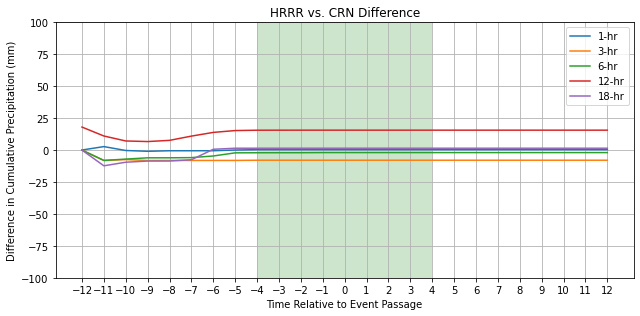

In [161]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_gai,label="1-hr")
plt.plot(hour,diff3_gai,label="3-hr")
plt.plot(hour,diff6_gai,label="6-hr")
plt.plot(hour,diff12_gai,label="12-hr")
plt.plot(hour,diff18_gai,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Fairhope, AL: 0200 UTC 14 April 2022-0200 UTC 15 April 2022</font>

In [162]:
#1 hr hrrr:
with open('hrrr_f01_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2473:2498]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.02  0.052 0.286 0.376 0.407 0.96  2.148 3.783 4.07  4.155 4.157 4.157
 4.204 4.204 4.412 4.523 4.523 4.523 4.523 4.523 4.523 4.523 4.523 4.523
 4.523]


In [163]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Fairhope_3_NE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2473:2498]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   2.1  2.1 10.9 17.7 20.1 24.  28.6 28.9 28.9 28.9 28.9 28.9
 28.9 28.9 28.9 28.9 28.9 28.9 28.9 28.9 28.9 28.9 28.9]


In [164]:
difference_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_fai.append(temp_i-temp_crn_i)

print(difference_fai)

[0.02, 0.052000000000000005, -1.814, -1.7240000000000002, -10.493, -16.74, -17.951999999999998, -20.216999999999995, -24.529999999999994, -24.744999999999994, -24.742999999999995, -24.742999999999995, -24.695999999999994, -24.695999999999994, -24.487999999999996, -24.376999999999995, -24.376999999999995, -24.376999999999995, -24.376999999999995, -24.376999999999995, -24.376999999999995, -24.376999999999995, -24.376999999999995, -24.376999999999995, -24.376999999999995]


In [165]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [166]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",fairhope1)

RSME 1-hr 48-hr HRRR vs CRN : 21.286516114197735


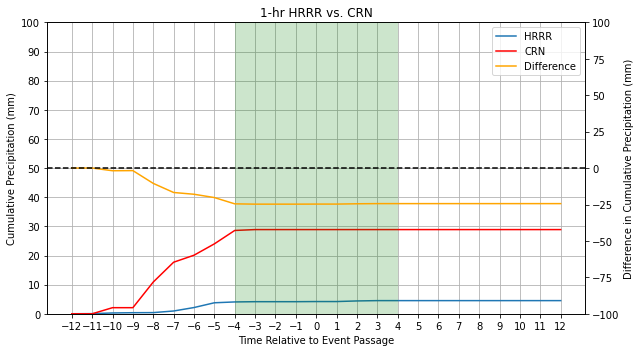

In [167]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_fai, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [168]:
#3 hr hrrr:
with open('hrrr_f03_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2471:2496]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.3000e-02 1.9000e-02 5.2000e-02 5.8000e-02 8.0000e-02 1.3100e-01
 1.4730e+00 1.8897e+01 2.0049e+01 2.0060e+01 2.0091e+01 2.1711e+01
 2.1879e+01 2.1954e+01 2.2033e+01 2.2323e+01 2.2393e+01 2.2393e+01
 2.2393e+01 2.2393e+01 2.2393e+01 2.2393e+01 2.2393e+01 2.2393e+01
 2.2393e+01]


In [169]:
diff3_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_fai.append(temp_i-temp_crn_i)

print(diff3_fai)

[0.013, 0.019, -2.048, -2.0420000000000003, -10.82, -17.569, -18.627, -5.102999999999998, -8.550999999999995, -8.839999999999996, -8.808999999999997, -7.1889999999999965, -7.020999999999997, -6.945999999999998, -6.866999999999997, -6.576999999999998, -6.506999999999998, -6.506999999999998, -6.506999999999998, -6.506999999999998, -6.506999999999998, -6.506999999999998, -6.506999999999998, -6.506999999999998, -6.506999999999998]


In [170]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [171]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",fairhope3)

RSME 3-hr 48-hr HRRR vs CRN : 8.14047005031036


In [172]:
#6 hr hrrr:
with open('hrrr_f06_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2468:2493]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.028  0.028  0.028  0.043  2.222 10.949 11.447 11.447
 11.449 12.062 12.115 12.115 12.115 16.415 22.07  22.095 22.105 22.105
 22.105 22.105 22.105 22.105 22.105]


In [173]:
diff6_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_fai.append(temp_i-temp_crn_i)

print(diff6_fai)

[0.0, 0.0, -2.072, -2.072, -10.872, -17.657, -17.877999999999997, -13.050999999999997, -17.152999999999995, -17.452999999999996, -17.450999999999993, -16.837999999999994, -16.784999999999997, -16.784999999999997, -16.784999999999997, -12.484999999999996, -6.829999999999995, -6.804999999999996, -6.794999999999995, -6.794999999999995, -6.794999999999995, -6.794999999999995, -6.794999999999995, -6.794999999999995, -6.794999999999995]


In [174]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [175]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",fairhope6)

RSME 6-hr 48-hr HRRR vs CRN : 11.887205136616425


In [176]:
#12 hr hrrr:
with open('hrrr_f12_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.8000e-02
 1.1388e+01 1.4741e+01 1.7130e+01 1.7600e+01 1.7858e+01 1.7858e+01
 1.7858e+01 1.7971e+01 2.3291e+01 2.3948e+01 2.5482e+01 2.7532e+01
 2.8472e+01 2.9862e+01 3.0024e+01 3.0024e+01 3.0024e+01 3.0024e+01
 3.0024e+01]
25


In [177]:
diff12_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_fai.append(temp_i-temp_crn_i)

print(diff12_fai)

[0.0, 0.0, -2.1, -2.1, -10.9, -17.682, -8.711999999999998, -9.258999999999997, -11.469999999999995, -11.299999999999997, -11.041999999999998, -11.041999999999998, -11.041999999999998, -10.928999999999998, -5.608999999999998, -4.951999999999998, -3.4179999999999993, -1.3679999999999986, -0.42799999999999727, 0.9620000000000033, 1.1240000000000023, 1.1240000000000023, 1.1240000000000023, 1.1240000000000023, 1.1240000000000023]


In [178]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [179]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",fairhope12)

RSME 12-hr 48-hr HRRR vs CRN : 7.545449550556944


In [180]:
#18 hr hrrr:
with open('hrrr_f18_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2456:2481]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.     0.     0.    23.77  28.159 33.609 35.78
 35.819 37.991 38.361 38.391 38.391 38.391 38.391 38.391 38.391 38.401
 38.401 38.402 38.406 38.596 38.596]


In [181]:
diff18_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_fai.append(temp_i-temp_crn_i)

print(diff18_fai)

[0.0, 0.0, -2.1, -2.1, -10.9, -17.7, 3.6700000000000017, 4.1590000000000025, 5.0090000000000074, 6.880000000000006, 6.919000000000008, 9.091000000000005, 9.461000000000002, 9.491000000000003, 9.491000000000003, 9.491000000000003, 9.491000000000003, 9.491000000000003, 9.491000000000003, 9.501000000000001, 9.501000000000001, 9.501999999999999, 9.505999999999997, 9.695999999999994, 9.695999999999994]


In [182]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [183]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",fairhope18)

RSME 18-hr 48-hr HRRR vs CRN : 8.611223803850416


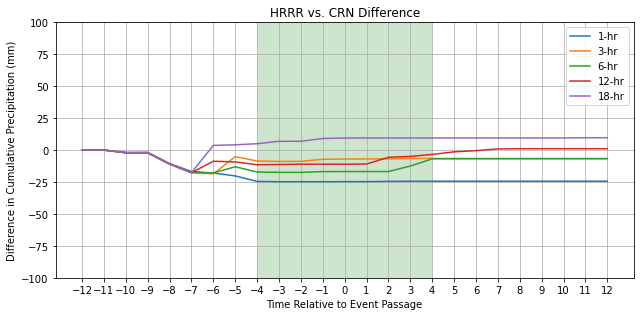

In [184]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_fai,label="1-hr")
plt.plot(hour,diff3_fai,label="3-hr")
plt.plot(hour,diff6_fai,label="6-hr")
plt.plot(hour,diff12_fai,label="12-hr")
plt.plot(hour,diff18_fai,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Selma, AL: 0200 UTC 14 April 2022-0200 UTC 15 April 2022
</font>

In [185]:
#1 hr hrrr:
with open('hrrr_f01_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2473:2498]
    temp=np.cumsum(temp)
    
#Air Temp CRN:
with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2473:2498]
    temp_crn=np.cumsum(temp_crn)
    print(temp)
    print(len(temp))
    print(temp_crn)
    print(len(temp_crn))
#full time period is [2015:2112]
difference_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sel.append(temp_i-temp_crn_i)

print(difference_sel)
print(len(difference_sel))

[0.000e+00 0.000e+00 1.000e-03 3.110e-01 5.687e+00 8.729e+00 8.958e+00
 8.968e+00 8.968e+00 8.968e+00 9.180e+00 9.180e+00 9.180e+00 9.180e+00
 9.180e+00 9.180e+00 9.180e+00 9.180e+00 9.180e+00 9.180e+00 9.180e+00
 9.180e+00 9.180e+00 9.180e+00 9.180e+00]
25
[ 0.   0.   9.9 15.1 20.  20.6 20.6 20.6 20.6 20.6 21.1 21.1 21.1 21.1
 21.1 21.1 21.1 21.1 21.1 21.1 21.1 21.1 21.1 21.1 21.1]
25
[0.0, 0.0, -9.899000000000001, -14.789000000000001, -14.312999999999999, -11.871000000000002, -11.642000000000003, -11.632000000000003, -11.632000000000003, -11.632000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003, -11.920000000000003]
25


In [186]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# difference_sel[17]=None
# difference_sel[18]=None
# difference_sel[19]=None
# difference_sel[20]=None
# print(temp)
# print(temp_crn)
# print(difference_sel)


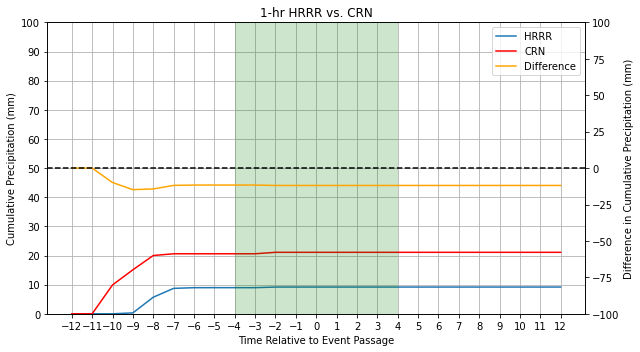

In [187]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sel, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [188]:
#3 hr hrrr:
with open('hrrr_f03_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2471:2496]
    temp=np.cumsum(temp)

# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

    print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff3_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sel.append(temp_i-temp_crn_i)

print(diff3_sel)
print(len(diff3_sel))

[0.    0.    0.    0.569 7.504 8.353 8.353 8.354 8.355 8.355 8.355 8.355
 8.417 8.417 8.417 8.417 8.417 8.417 8.417 8.417 8.417 8.417 8.417 8.417
 8.417]
[0.0, 0.0, -9.9, -14.531000000000002, -12.496, -12.247000000000002, -12.247000000000002, -12.246000000000002, -12.245000000000003, -12.245000000000003, -12.745000000000003, -12.745000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003, -12.683000000000003]
25


In [189]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff3_sel[17]=None
# diff3_sel[18]=None
# diff3_sel[19]=None
# diff3_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff3_sel)

In [190]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [191]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",selma3)

In [192]:
#6 hr hrrr:
with open('hrrr_f06_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2468:2493]
    temp=np.cumsum(temp)

# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]
print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff6_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sel.append(temp_i-temp_crn_i)

print(diff6_sel)
print(len(diff6_sel))

[ 0.     0.     0.     0.    33.523 40.837 40.894 40.894 40.894 44.585
 47.944 48.523 48.586 48.586 48.586 48.586 48.586 48.586 48.586 48.586
 48.586 48.586 48.586 48.586 48.586]
[0.0, 0.0, -9.9, -15.100000000000001, 13.523000000000003, 20.237000000000002, 20.294000000000004, 20.294000000000004, 20.294000000000004, 23.985000000000007, 26.84400000000001, 27.42300000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001, 27.48600000000001]
25


In [193]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff6_sel[17]=None
# diff6_sel[18]=None
# diff6_sel[19]=None
# diff6_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff6_sel)

In [194]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [195]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",selma6)

In [196]:
#12 hr hrrr:
with open('hrrr_f12_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff12_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sel.append(temp_i-temp_crn_i)

print(diff12_sel)
print(len(diff12_sel))

[0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-03 1.4893e+01 3.4938e+01
 3.9613e+01 4.0263e+01 4.0265e+01 4.0265e+01 4.0782e+01 4.0946e+01
 4.0994e+01 4.0994e+01 4.1214e+01 4.1372e+01 4.1372e+01 4.1372e+01
 4.1372e+01 4.1372e+01 4.1372e+01 4.1372e+01 4.1372e+01 4.1372e+01
 4.1372e+01]
[0.0, 0.0, -9.9, -15.099000000000002, -5.107000000000001, 14.338000000000001, 19.012999999999998, 19.662999999999997, 19.665, 19.665, 19.682000000000002, 19.846000000000004, 19.894000000000005, 19.894000000000005, 20.114000000000004, 20.272000000000006, 20.272000000000006, 20.272000000000006, 20.272000000000006, 20.272000000000006, 20.272000000000006, 20.272000000000006, 20.272000000000006, 20.272000000000006, 20.272000000000006]
25


In [197]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff12_sel[17]=None
# diff12_sel[18]=None
# diff12_sel[19]=None
# diff12_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff12_sel)

In [198]:
# difference12 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference12.append(temp_i-temp_crn_i)

# print(difference12)

In [199]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [200]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",selma12)

In [201]:
#18 hr hrrr:
with open('hrrr_f18_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2456:2481]
    temp=np.cumsum(temp)
    
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff18_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sel.append(temp_i-temp_crn_i)

print(diff18_sel)
print(len(diff18_sel))

[0.0000e+00 0.0000e+00 1.0000e-03 1.0000e-03 8.7620e+00 9.7810e+00
 1.2411e+01 1.3227e+01 1.3363e+01 1.4410e+01 1.4855e+01 1.5547e+01
 1.5547e+01 1.5587e+01 1.5587e+01 1.5587e+01 1.5587e+01 1.5587e+01
 1.5587e+01 1.5587e+01 1.5587e+01 1.5587e+01 1.5587e+01 1.5587e+01
 1.5587e+01]
[0.0, 0.0, -9.899000000000001, -15.099000000000002, -11.238000000000001, -10.819000000000003, -8.189000000000004, -7.373000000000003, -7.237000000000004, -6.190000000000003, -6.245000000000003, -5.553000000000003, -5.553000000000003, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035, -5.5130000000000035]
25


In [202]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff18_sel[17]=None
# diff18_sel[18]=None
# diff18_sel[19]=None
# diff18_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff18_sel)

In [203]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [204]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",selma18)

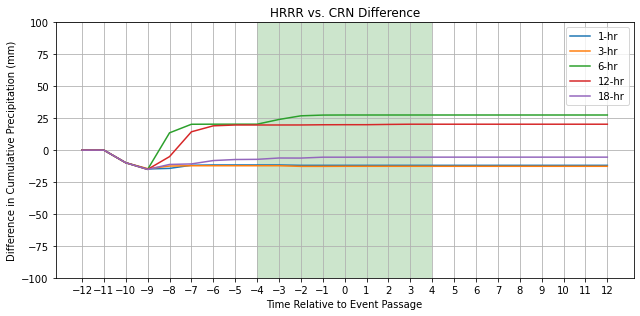

In [205]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sel,label="1-hr")
plt.plot(hour,diff3_sel,label="3-hr")
plt.plot(hour,diff6_sel,label="6-hr")
plt.plot(hour,diff12_sel,label="12-hr")
plt.plot(hour,diff18_sel,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Bowling Green, KY: 0200 UTC 14 April 2022-0200 UTC 15 April 2022</font>

In [206]:
#1 hr hrrr:
with open('hrrr_f01_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2473:2498]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.08  3.643 3.728 3.728 3.906 4.226 4.605 4.616 4.616 4.616 4.616 4.616
 4.616 4.616 4.616 4.616 4.616 4.616 4.616 4.616 4.616 4.616 4.616 4.616
 4.616]


In [207]:
# hour=[]
# for i in range(-8,17,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

In [208]:
#Air Temp CRN:
with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2473:2498]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 6.4 11.7 11.9 11.9 12.5 12.7 12.9 12.9 12.9 12.9 12.9 12.9 12.9 12.9
 12.9 12.9 12.9 12.9 12.9 12.9 12.9 12.9 12.9 12.9 12.9]


In [209]:
difference_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bow.append(temp_i-temp_crn_i)

print(difference_bow)

[-5.32, -8.056999999999999, -8.171999999999999, -8.171999999999999, -8.593999999999998, -8.473999999999997, -8.294999999999996, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995, -8.283999999999995]


In [210]:
# temp[6]=None
# temp_crn[6]=None
# difference_bow[6]=None

# print(temp)
# print(temp_crn)
# print(difference_bow)

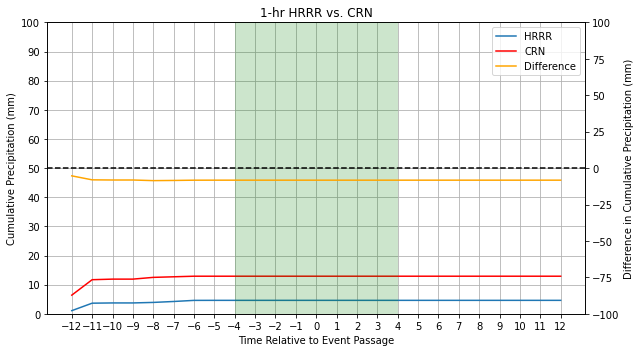

In [211]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bow, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [212]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [213]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",bowling1)

In [214]:
#3 hr hrrr:
with open('hrrr_f03_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2471:2496]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[ 0.976  9.073 16.486 16.486 16.579 16.697 16.704 16.776 16.826 16.826
 16.826 16.826 16.826 16.826 16.826 16.826 16.826 16.826 16.826 16.826
 16.826 16.826 16.826 16.826 16.826]


In [215]:
diff3_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bow.append(temp_i-temp_crn_i)

print(diff3_bow)

[-5.424, -2.626999999999999, 4.586000000000002, 4.586000000000002, 4.079000000000002, 3.9970000000000017, 3.804000000000004, 3.876000000000003, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037, 3.9260000000000037]


In [216]:
# temp[6]=None
# temp_crn[6]=None
# diff3_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff3_bow)

In [217]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [218]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",bowling3)

In [219]:
#6 hr hrrr:
with open('hrrr_f06_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2468:2493]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[10.707 25.103 26.267 29.043 30.885 30.907 31.709 31.726 31.727 31.727
 31.727 31.727 31.727 31.727 31.727 31.727 31.727 31.727 31.727 31.727
 31.727 31.727 31.727 31.727 31.727]


In [220]:
diff6_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bow.append(temp_i-temp_crn_i)

print(diff6_bow)

[4.307, 13.403000000000002, 14.367000000000004, 17.143000000000004, 18.385000000000005, 18.207, 18.809000000000005, 18.826, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005, 18.827000000000005]


In [221]:
# temp[6]=None
# temp_crn[6]=None
# diff6_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff6_bow)

In [222]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [223]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",bowling6)

In [224]:
#12 hr hrrr:
with open('hrrr_f12_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2462:2487]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
# #full time period is [2015:2112]

[ 6.04   9.683  9.727  9.728 11.123 13.36  13.519 13.519 13.519 13.519
 13.519 13.519 13.519 13.519 13.519 13.519 13.519 13.519 13.519 13.519
 13.519 13.519 13.519 13.519 13.519]
25


In [225]:
diff12_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bow.append(temp_i-temp_crn_i)

print(diff12_bow)

[-0.3600000000000003, -2.0169999999999995, -2.1729999999999983, -2.171999999999999, -1.376999999999999, 0.6600000000000019, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033, 0.6190000000000033]


In [226]:
# temp[6]=None
# temp_crn[6]=None
# diff12_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff12_bow)

In [227]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [228]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",bowling12)

In [229]:
#18 hr hrrr:
with open('hrrr_f18_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2456:2481]
    temp=np.cumsum(temp)
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[ 6.689 14.539 16.811 16.882 19.333 19.906 19.906 19.906 19.906 19.906
 19.906 19.906 19.906 19.906 19.906 19.906 19.906 19.906 19.906 19.906
 19.906 19.906 19.906 19.906 19.906]


In [230]:
diff18_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bow.append(temp_i-temp_crn_i)

print(diff18_bow)

[0.2889999999999997, 2.8390000000000004, 4.911000000000001, 4.982000000000003, 6.833000000000004, 7.206000000000005, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006, 7.006000000000006]


In [231]:
# temp[6]=None
# temp_crn[6]=None
# diff18_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff18_bow)

In [232]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [233]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",bowling18)

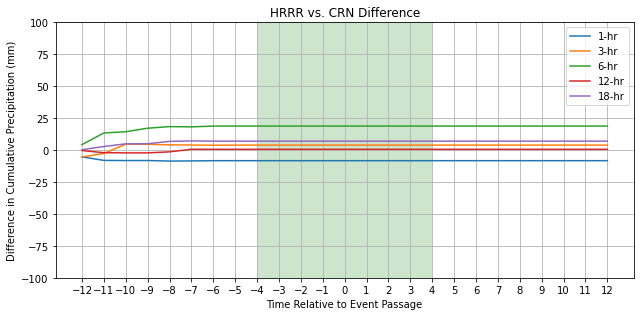

In [234]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bow,label="1-hr")
plt.plot(hour,diff3_bow,label="3-hr")
plt.plot(hour,diff6_bow,label="6-hr")
plt.plot(hour,diff12_bow,label="12-hr")
plt.plot(hour,diff18_bow,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gadsden, AL: 0200 UTC 31 March 2022-0200 UTC 1 April 2022</font>

In [235]:
# #1 hr hrrr:
# with open('hrrr_f01_Gadsden_AL.txt') as f:
#     lst=[line.split()[2] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[2137:2162]
#     temp=np.cumsum(temp)
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [236]:
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Gadsden_19_N.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2137:2162]
#     temp_crn=np.cumsum(temp_crn)
#     #temp_crn=np.cumsum(temp_crn)
#     print(temp_crn)
#     #print(len(temp_crn))
#     # print(temp_crn[2124])

In [237]:
# difference_gad = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference_gad.append(temp_i-temp_crn_i)

# print(difference_gad)

In [238]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [239]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",gadsden1)

In [240]:
# plt.rcParams["figure.figsize"] = [9, 5]
# plt.rcParams["figure.autolayout"] = True

# ax1 = plt.subplot()
# plt.grid()
# ax1.grid(True, which='both')
# l1, = ax1.plot(hour,temp)
# l3, = ax1.plot(hour,temp_crn, color='red')
# ax1.set_ylim(8, 26)
# plt.yticks(np.arange(8,27,1.5))
# ax2 = ax1.twinx()
# l2, = ax2.plot(hour,difference_gad, color='orange')
# ax2.set_ylim(-10, 10)
# plt.axhline(y=0, color='black', linestyle='dashed')
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# #ax2.yticks(np.arange(-6, 11, 2.0))
# plt.title("1-hr HRRR vs. CRN")
# plt.ylabel("Difference")
# ax1.set_ylabel("Air Temperature (C)")
# ax1.set_xlabel("UTC Hour")

# plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

# plt.show()

In [241]:
# #3 hr hrrr:
# with open('hrrr_f03_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1942:1967]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [242]:
# difference3 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference3.append(temp_i-temp_crn_i)

# print(difference3)

In [243]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [244]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",gadsden3)

In [245]:
# #6 hr hrrr:
# with open('hrrr_f06_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1939:1964]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [246]:
# difference6 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference6.append(temp_i-temp_crn_i)

# print(difference6)

In [247]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [248]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",gadsden6)

In [249]:
# #12 hr hrrr:
# with open('hrrr_f12_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1933:1958]
#     #temp=temp[2015:2063]
#     print(temp)
#     print(len(temp))
# #full time period is [2015:2112]

In [250]:
# difference12 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference12.append(temp_i-temp_crn_i)

# print(difference12)

In [251]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [252]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",gadsden12)

In [253]:
# #18 hr hrrr:
# with open('hrrr_f18_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     #print(temp.index(6.91541))
#     temp=temp[1927:1952]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [254]:
# difference18 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference18.append(temp_i-temp_crn_i)

# print(difference18)

In [255]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [256]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",gadsden18)

In [257]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference_gad,label="1-hr")
# plt.plot(hour,difference3,label="3-hr")
# plt.plot(hour,difference6,label="6-hr")
# plt.plot(hour,difference12,label="12-hr")
# plt.plot(hour,difference18,label="18-hr")
# plt.yticks(np.arange(-10, 11, 2.0))
# plt.ylim(-10, 10)
# plt.title("HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temperature (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# #plt.grid(axis='y')
# plt.grid()
# plt.legend()
# plt.show()

<font size="3">Newton, GA: 0600 UTC 14 April 2022-0600 UTC 15 April 2022
</font>

In [258]:
#1 hr hrrr:
with open('hrrr_f01_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2477:2502]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.    0.    0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009
 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009
 0.009]


In [259]:
#Air Temp CRN:
with open('CRNH0203-2022-GA_Newton_11_SW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2477:2502]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [260]:
difference_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_newt.append(temp_i-temp_crn_i)

print(difference_newt)

[0.0, 0.0, 0.0, 0.0, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009]


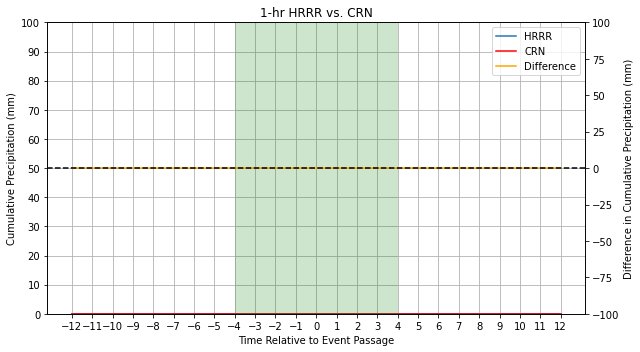

In [261]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_newt, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [262]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [263]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonga1)

RSME 1-hr 48-hr HRRR vs CRN : 0.008248636250920512


In [264]:
#3 hr hrrr:
with open('hrrr_f03_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2475:2500]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [265]:
diff3_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_newt.append(temp_i-temp_crn_i)

print(diff3_newt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [266]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [267]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonga3)

RSME 3-hr 48-hr HRRR vs CRN : 0.0


In [268]:
#6 hr hrrr:
with open('hrrr_f06_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2472:2497]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.    0.    0.    0.    0.002 0.06  0.06  0.06  0.06  0.06
 0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06
 0.06 ]


In [269]:
diff6_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_newt.append(temp_i-temp_crn_i)

print(diff6_newt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005, 0.060000000000000005]


In [270]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [271]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonga6)

RSME 6-hr 48-hr HRRR vs CRN : 0.05091325956958561


In [272]:
#12 hr hrrr:
with open('hrrr_f12_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2466:2491]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.    0.    0.    0.    0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001]
25


In [273]:
diff12_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_newt.append(temp_i-temp_crn_i)

print(diff12_newt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


In [274]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [275]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonga12)

RSME 12-hr 48-hr HRRR vs CRN : 0.0008717797887081347


In [276]:
#18 hr hrrr:
with open('hrrr_f18_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2460:2485]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.     0.     0.051  3.785  3.802  3.802  3.822
  3.822  3.822  3.822  3.822  3.822  3.852  3.865 30.7   31.374 31.374
 31.428 31.428 31.428 31.428 31.428]


In [277]:
diff18_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_newt.append(temp_i-temp_crn_i)

print(diff18_newt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.051, 3.785, 3.802, 3.802, 3.822, 3.822, 3.822, 3.822, 3.822, 3.822, 3.852, 3.8649999999999998, 30.7, 31.374, 31.374, 31.427999999999997, 31.427999999999997, 31.427999999999997, 31.427999999999997, 31.427999999999997]


In [278]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [279]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonga18)

RSME 18-hr 48-hr HRRR vs CRN : 17.90017110421015


In [280]:
# hour=[]
# for i in range(-12,13,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

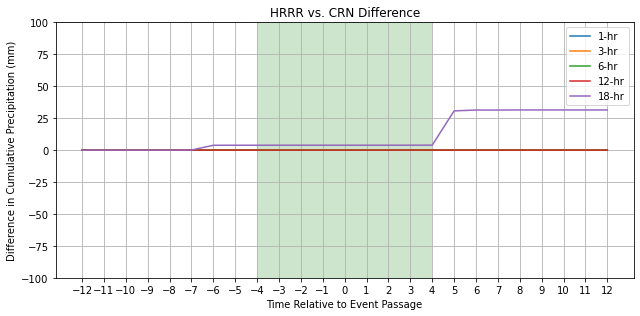

In [281]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_newt,label="1-hr")
plt.plot(hour,diff3_newt,label="3-hr")
plt.plot(hour,diff6_newt,label="6-hr")
plt.plot(hour,diff12_newt,label="12-hr")
plt.plot(hour,diff18_newt,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

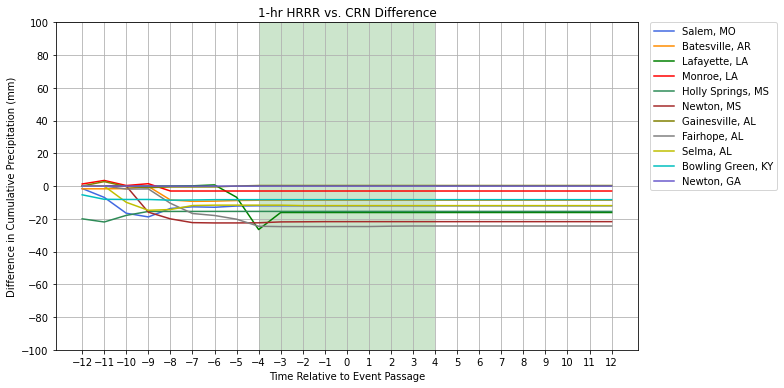

In [282]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,difference_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,difference_laf,c='g',label="Lafayette, LA")
plt.plot(hour,difference_mon,c='r',label="Monroe, LA")
plt.plot(hour,difference_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,difference_new,c='brown',label="Newton, MS")
plt.plot(hour,difference_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,difference_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,difference_sel,c='y',label="Selma, AL")
plt.plot(hour,difference_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,difference_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,difference_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("1-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

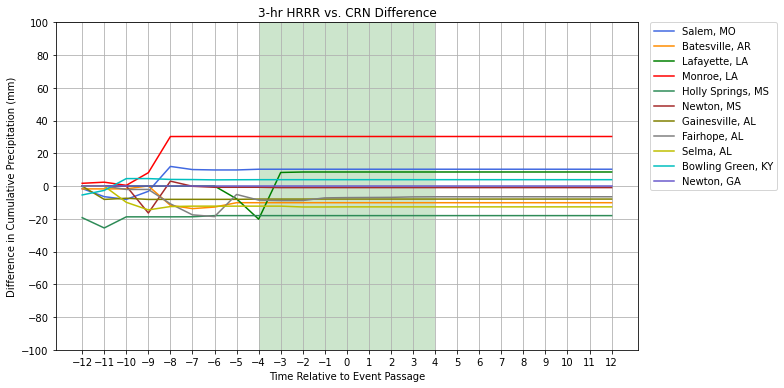

In [283]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff3_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff3_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff3_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff3_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff3_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff3_new,c='brown',label="Newton, MS")
plt.plot(hour,diff3_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff3_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff3_sel,c='y',label="Selma, AL")
plt.plot(hour,diff3_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff3_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff3_newt,c='slateblue',label="Newton, GA")


plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("3-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

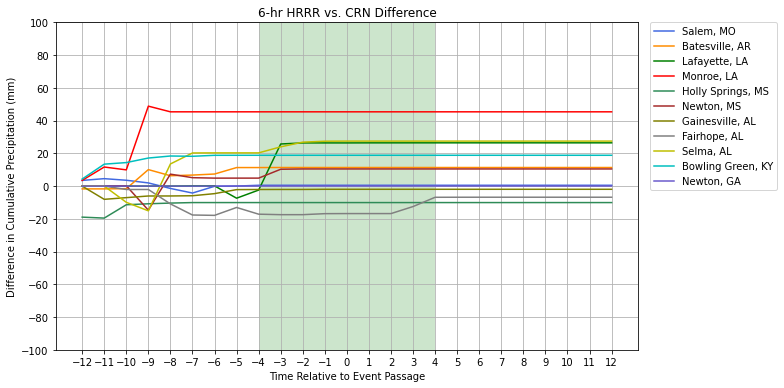

In [284]:
#plot 6-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff6_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff6_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff6_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff6_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff6_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff6_new,c='brown',label="Newton, MS")
plt.plot(hour,diff6_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff6_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff6_sel,c='y',label="Selma, AL")
plt.plot(hour,diff6_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff6_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff6_newt,c='slateblue',label="Newton, GA")


plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("6-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

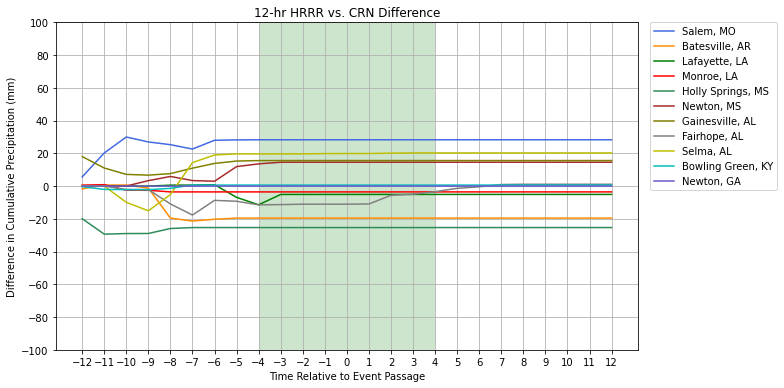

In [285]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff12_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff12_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff12_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff12_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff12_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff12_new,c='brown',label="Newton, MS")
plt.plot(hour,diff12_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff12_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff12_sel,c='y',label="Selma, AL")
plt.plot(hour,diff12_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff12_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff12_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("12-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

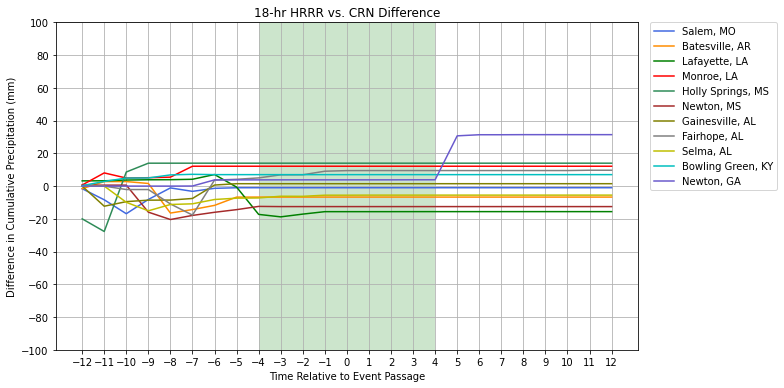

In [286]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff18_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff18_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff18_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff18_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff18_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff18_new,c='brown',label="Newton, MS")
plt.plot(hour,diff18_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff18_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff18_sel,c='y',label="Selma, AL")
plt.plot(hour,diff18_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff18_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff18_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("18-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()